Sample Data:
                                     review sentiment
0  This exceeded my expectations. Loved it!  positive
1  This exceeded my expectations. Loved it!  positive
2  Terrible quality and very slow delivery.  negative
3          Low quality and very unreliable.  negative
4       Amazing! Will definitely buy again.  positive

Model Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.88      0.93        16

    accuracy                           0.90        20
   macro avg       0.83      0.94      0.87        20
weighted avg       0.93      0.90      0.91        20



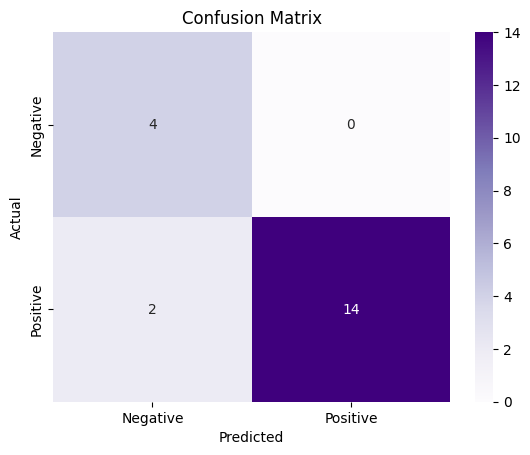

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('Movie_reviews.csv') 
df.columns = ['review', 'sentiment']  
print("Sample Data:")
print(df.head())

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and whitespace
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['label'], test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
